In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("us_baby_names.csv")

In [3]:
df.groupby(["Name","Gender"]).Count.sum().reset_index(level=-1)

,Gender,Count
Name,,
Aaban,M,114
Aabha,F,35
Aabid,M,16
Aabidah,F,5
Aabir,M,10
...,...,...
Zyvion,M,5
Zyvon,M,7
Zyyanna,F,6


In [4]:
agg=df.groupby(['Name','Gender']).agg(Total=('Count','sum'),First_year=('Year','min'), Last_year=('Year','max'),
                                     Max_count=('Count','max'),No_year=('Count','count'))

In [5]:
agg.reset_index(inplace=True)
agg

,Name,Gender,Total,First_year,Last_year,Max_count,No_year
0,Aaban,M,114,2007,2018,16,11
1,Aabha,F,35,2011,2016,9,5
2,Aabid,M,16,2003,2018,6,3
3,Aabidah,F,5,2018,2018,5,1
4,Aabir,M,10,2016,2018,5,2
...,...,...,...,...,...,...,...
109168,Zyvion,M,5,2009,2009,5,1
109169,Zyvon,M,7,2015,2015,7,1
109170,Zyyanna,F,6,2010,2010,6,1
109171,Zyyon,M,6,2014,2014,6,1


In [6]:
def best_year(group):
    return group.nlargest(1,"Count").Year

In [7]:
#best_y=df.groupby(['Name','Gender']).apply(best_year)        #its taking too long 

In [8]:
#best_y.droplevel(-1)

In [9]:
agg.groupby('Gender').apply(lambda x: x.nlargest(10,"Total"))


Name Gender    Total  First_year  Last_year  Max_count  \
Gender                                                                       
F      68679        Mary      F  4125675        1880       2018      73985   
       30706   Elizabeth      F  1638349        1880       2018      20744   
       79184    Patricia      F  1572016        1884       2018      56442   
       46567    Jennifer      F  1467207        1916       2018      63603   
       62973       Linda      F  1452668        1880       2018      99689   
       11699     Barbara      F  1434397        1880       2018      48792   
       67371    Margaret      F  1248985        1880       2018      28467   
       94540       Susan      F  1121703        1880       2018      47402   
       28575     Dorothy      F  1107635        1880       2018      39999   
       87546       Sarah      F  1077746        1880       2018      28484   
M      43582       James      M  5164280        1880       2018      94757   
       48388        John      M  5124817        1880       2018      88319   
       84427      Robert      M  4820129        1880       2018      91640   
       71023     Michael      M  4362731        1880       2018      92704   
       104615    William      M  4117369        1880       2018      66989   
       24204       David      M  3621322        1880       2018      86253   
       49192      Joseph      M  2613304        1880       2018      32732   
       83864     Richard      M  2565301        1880       2018      58868   
       18299     Charles      M  2392779        1880       2018      40770   
       98544      Thomas      M  2311849        1880       2018      48652   

               No_year  
Gender                  
F      68679       139  
       30706       139  
       79184       135  
       46567       101  
       62973       139  
       11699       139  
       67371       139  
       94540       139  
       28575       139  
       87546       139  
M      43582       139  
       48388       139  
       84427       139  
       71023       139  
       104615      139  
       24204       139  
       49192       139  
       83864       139  
       18299       139  
       98544       139

In [10]:
lon=agg.groupby('Gender').apply(lambda x: x.nlargest(10,"Total")).reset_index(drop=True)
lon

,Name,Gender,Total,First_year,Last_year,Max_count,No_year
0,Mary,F,4125675,1880,2018,73985,139
1,Elizabeth,F,1638349,1880,2018,20744,139
2,Patricia,F,1572016,1884,2018,56442,135
3,Jennifer,F,1467207,1916,2018,63603,101
4,Linda,F,1452668,1880,2018,99689,139
5,Barbara,F,1434397,1880,2018,48792,139
6,Margaret,F,1248985,1880,2018,28467,139
7,Susan,F,1121703,1880,2018,47402,139
8,Dorothy,F,1107635,1880,2018,39999,139
9,Sarah,F,1077746,1880,2018,28484,139


<function matplotlib.pyplot.show(close=None, block=None)>

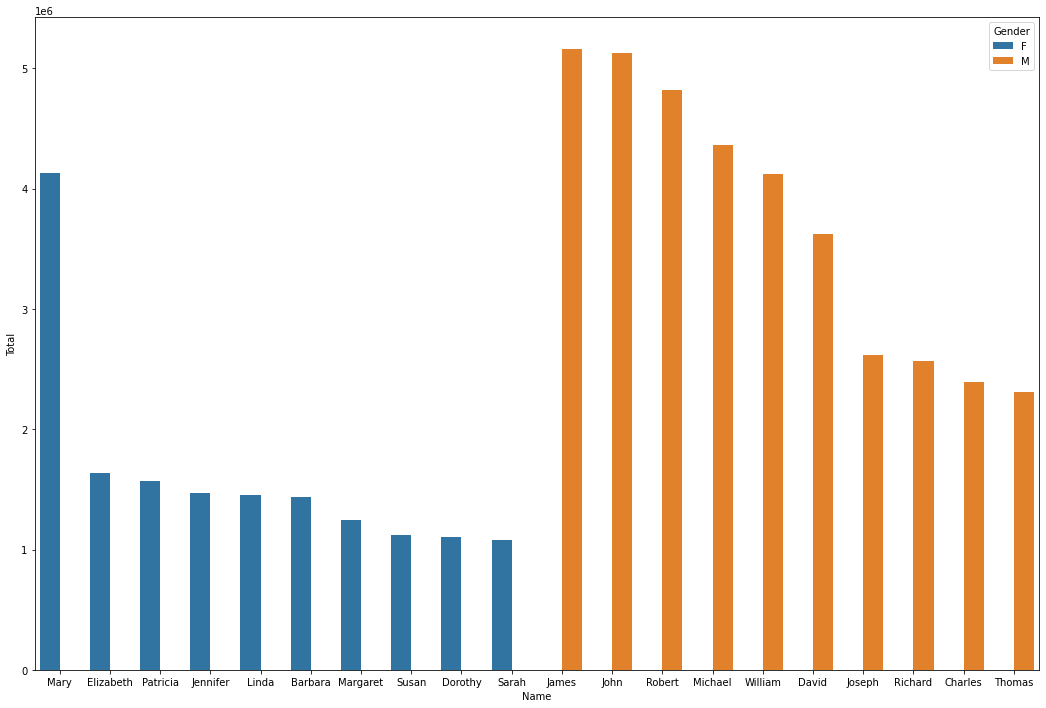

In [11]:
import seaborn as sns

plt.figure(figsize=(18,12))
sns.barplot(x="Name", y="Total",data=lon, hue="Gender")
plt.show

In [12]:
agg[(agg.Name=="Mary") & (agg.Gender=="F")]

,Name,Gender,Total,First_year,Last_year,Max_count,No_year
68679,Mary,F,4125675,1880,2018,73985,139


In [13]:
agg[(agg.Name=="Mary") & (agg.Gender=="M")]

,Name,Gender,Total,First_year,Last_year,Max_count,No_year
68680,Mary,M,15165,1880,2014,340,131


In [14]:
babies_per_year=df.groupby("Year").Count.sum()      #here this count is the column of the dataset

In [15]:
babies_per_year

Year
1880     201484
1881     192696
1882     221533
1883     216944
1884     243461
         ...   
2014    3698914
2015    3691990
2016    3657797
2017    3561975
2018    3487353
Name: Count, Length: 139, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

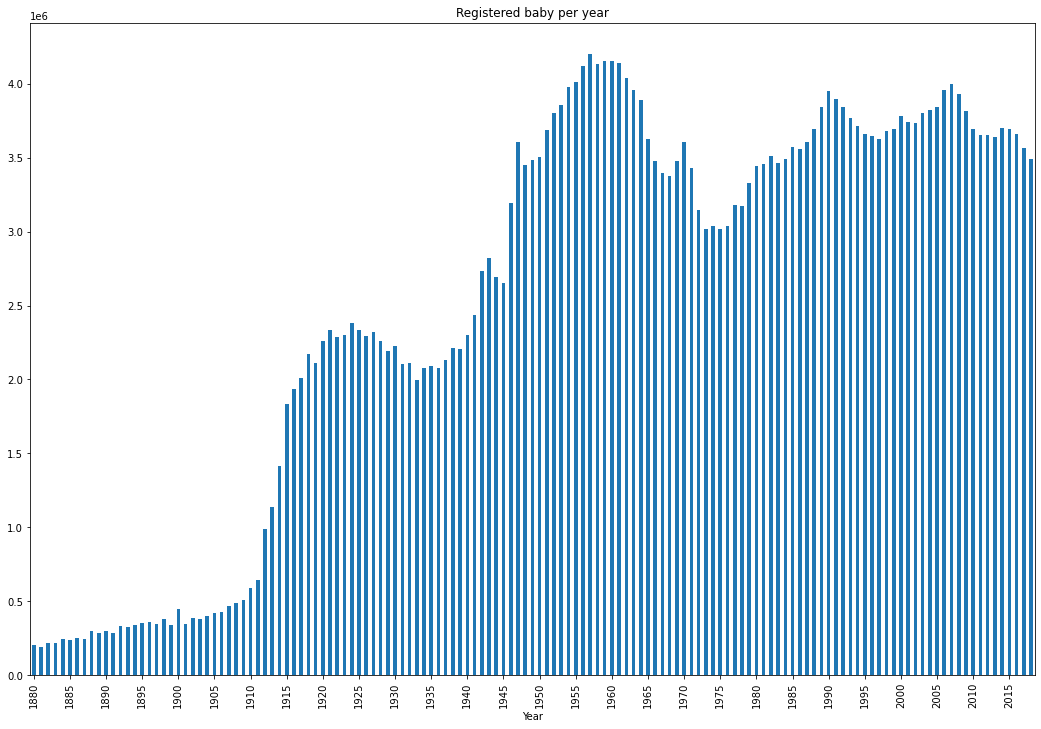

In [16]:
babies_per_year.plot(kind="bar", y="Count",figsize=(18,12))
plt.xticks(ticks= (range(0, len(babies_per_year), 5)), labels=range(1880,2019,5))
plt.title("Registered baby per year")
plt.show

In [17]:
diff_names=df.groupby("Year").Name.count()
diff_names

Year
1880     2000
1881     1935
1882     2127
1883     2084
1884     2297
        ...  
2014    33243
2015    33121
2016    33010
2017    32590
2018    32033
Name: Name, Length: 139, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

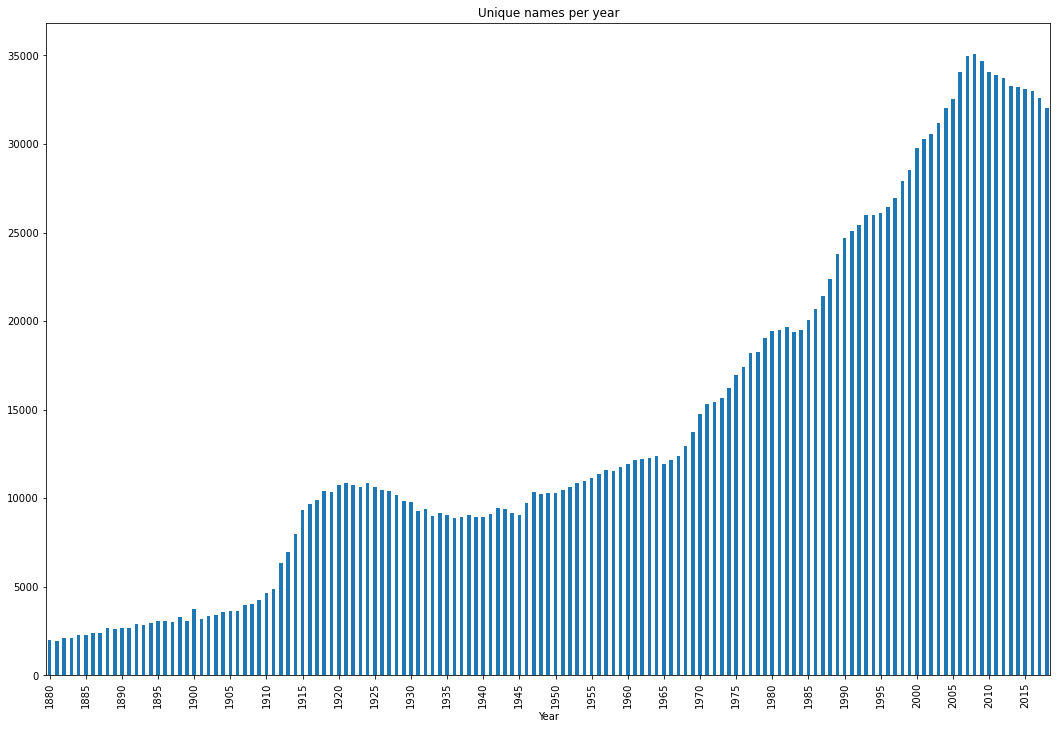

In [18]:
diff_names.plot(kind="bar", y="Count",figsize=(18,12))
plt.xticks(ticks= (range(0, len(diff_names), 5)), labels=range(1880,2019,5))
plt.title("Unique names per year")
plt.show

In [19]:
df
pd.options.display.float_format='{: .0f}'.format     #for no digits ater decimal

In [20]:
df.groupby(["Year","Gender"]).Count.sum()

Year  Gender
1880  F           90994
      M          110490
1881  F           91953
      M          100743
1882  F          107847
                 ...   
2016  M         1891585
2017  F         1719138
      M         1842837
2018  F         1686961
      M         1800392
Name: Count, Length: 278, dtype: int64

In [21]:
7065/90994 *1000000     #popularity for female in 1880

77642.48192188496

In [22]:
df.groupby(["Year","Gender"]).Count.transform("sum")

0            90994
1            90994
2            90994
3            90994
4            90994
            ...   
1957041    1800392
1957042    1800392
1957043    1800392
1957044    1800392
1957045    1800392
Name: Count, Length: 1957046, dtype: int64

In [23]:
df.Count.div(df.groupby(["Year","Gender"]).Count.transform("sum")) *1000000

0          77642
1          28617
2          22012
3          21309
4          19188
           ...  
1957041        3
1957042        3
1957043        3
1957044        3
1957045        3
Name: Count, Length: 1957046, dtype: float64

In [24]:
df["Popularity"]=df.Count.div(df.groupby(["Year","Gender"]).Count.transform("sum")) *1000000

In [25]:
df

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642
1,1880,Anna,F,2604,28617
2,1880,Emma,F,2003,22012
3,1880,Elizabeth,F,1939,21309
4,1880,Minnie,F,1746,19188
...,...,...,...,...,...
1957041,2018,Zylas,M,5,3
1957042,2018,Zyran,M,5,3
1957043,2018,Zyrie,M,5,3
1957044,2018,Zyron,M,5,3


In [26]:
df.groupby(["Year","Gender"]).Count.apply(lambda x: x.rank(ascending=False))

0              1
1              2
2              3
3              4
4              5
           ...  
1957041    13042
1957042    13042
1957043    13042
1957044    13042
1957045    13042
Name: Count, Length: 1957046, dtype: float64

In [27]:
df["Rank"]=df.groupby(["Year","Gender"]).Count.apply(lambda x: x.rank(ascending=False))

In [28]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


In [29]:
mary=df[(df.Name=="Mary")& (df.Gender=="F")]     #mary ranked no 1 till year 1929 as we see
mary.head(50)                                

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
2000,1881,Mary,F,6919,75245,1
3935,1882,Mary,F,8148,75551,1
6062,1883,Mary,F,8012,71333,1
8146,1884,Mary,F,9217,71439,1
10443,1885,Mary,F,9128,68603,1
12737,1886,Mary,F,9889,68420,1
15129,1887,Mary,F,9888,67735,1
17502,1888,Mary,F,11754,65804,1
20153,1889,Mary,F,11648,65304,1


<function matplotlib.pyplot.show(close=None, block=None)>

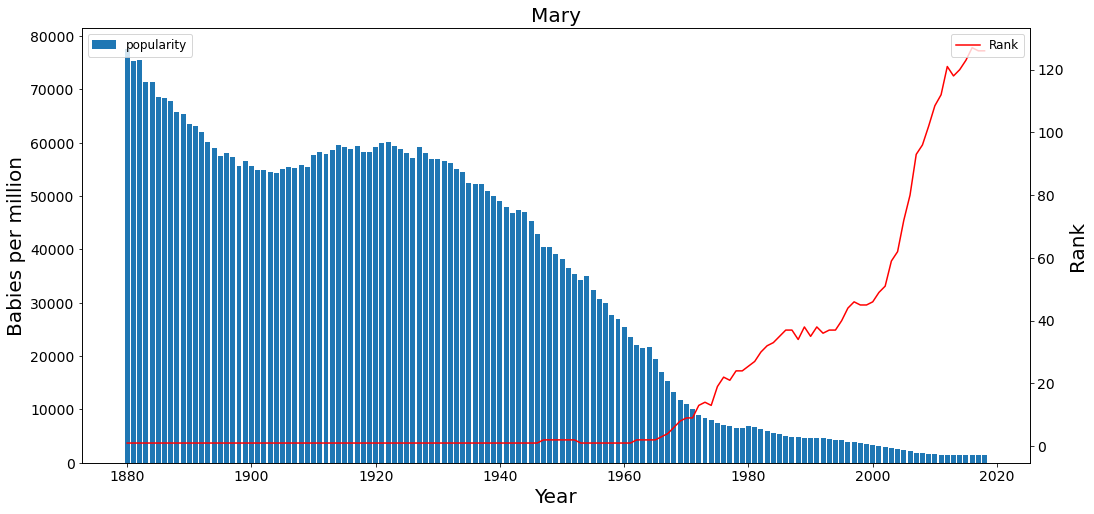

In [30]:
fig,ax1=plt.subplots(figsize=(17,8))
ax1.bar(x=mary.Year , height=mary.Popularity, label="popularity")
ax2=ax1.twinx()
ax2.plot(mary.Year, mary.Rank, color="red", label="Rank")
ax1.set_xlabel("Year",fontsize=20)
ax1.set_ylabel("Babies per million",fontsize=20)
ax2.set_ylabel("Rank",fontsize=20)
ax1.set_title("Mary",fontsize=20)
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
ax1.legend(loc=2,fontsize=12)
ax2.legend(loc=1,fontsize=12)


plt.show

In [31]:
def plot_name(name,gender,crit="Popularity"):
    data=df.loc[(df.Name==name) &(df.Gender==gender),['Name','Gender','Year','Rank',crit]]
    data=data.set_index("Year")
    
    
    fig,ax1=plt.subplots(figsize=(17,8))
    ax1.bar(x=data.index , height=data[crit], label=crit)
    ax2=ax1.twinx()
    ax2.plot(data.index, data.Rank, color="red", label="Rank")
    ax1.set_xlabel("Year",fontsize=20)
    ax1.set_ylabel(crit,fontsize=20)
    ax2.set_ylabel("Rank",fontsize=20)
    ax1.set_title(name, fontsize=20)
    ax1.tick_params(labelsize=14)
    ax2.tick_params(labelsize=14)
    ax1.legend(loc=2,fontsize=12)
    ax2.legend(loc=1,fontsize=12)
    plt.show

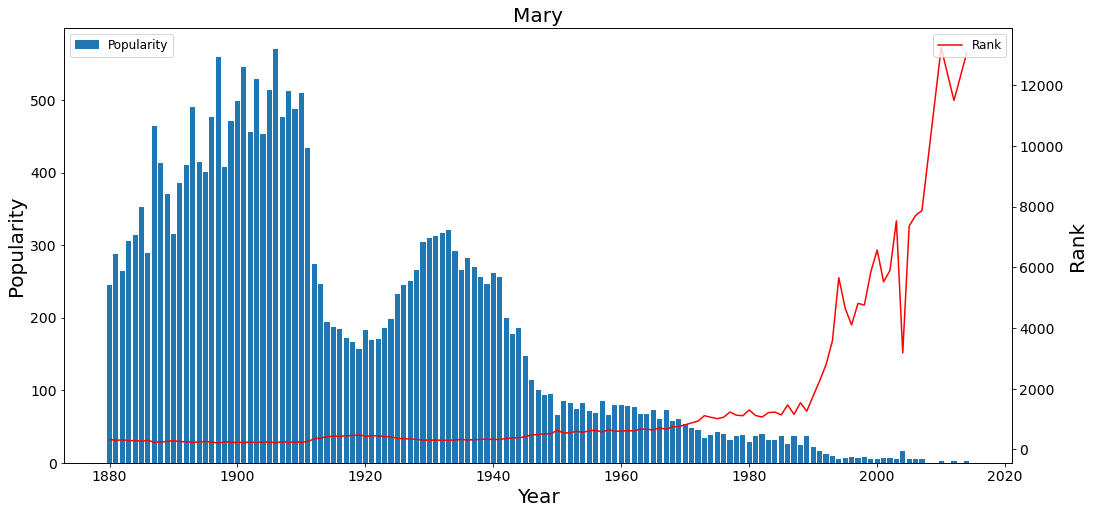

In [32]:
plot_name("Mary","M")

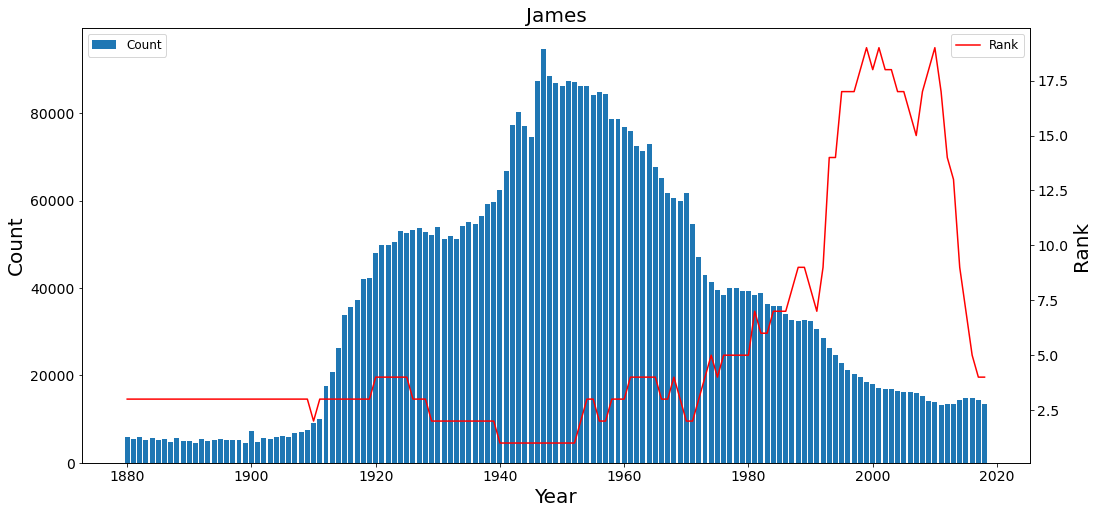

In [33]:
plot_name("James","M",crit="Count")

In [34]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


In [35]:
df.loc[(df.Name=="Mary") &(df.Gender=="F"), "Popularity"].shift()  #here shift just shift the popularity value to the next index
                                                                    #or to 1 year

0            NaN
2000       77642
3935       75245
6062       75551
8146       71333
           ...  
1793168     1514
1826414     1477
1859539     1478
1892548     1420
1925138     1397
Name: Popularity, Length: 139, dtype: float64

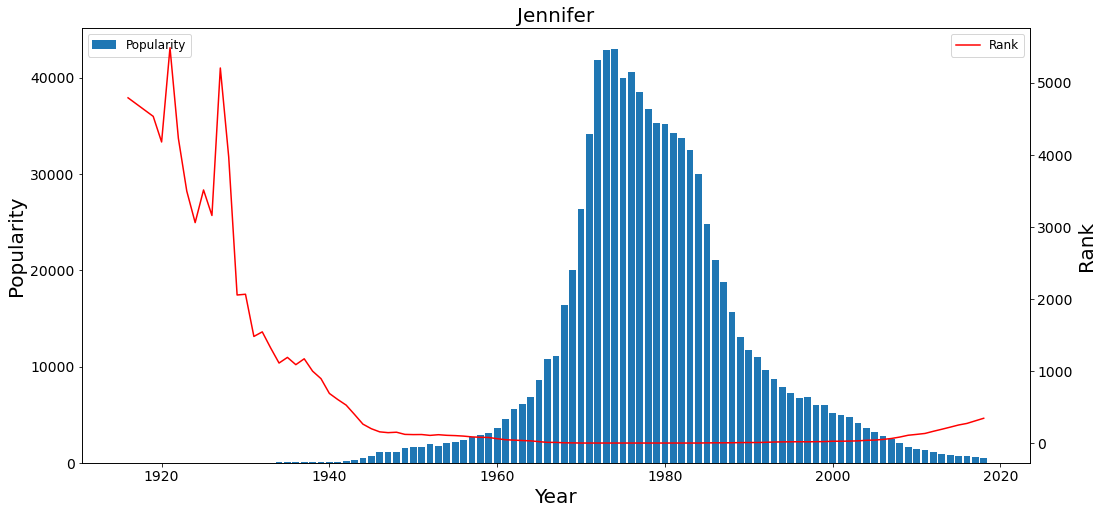

In [36]:
plot_name("Jennifer","F")

In [37]:
agg

,Name,Gender,Total,First_year,Last_year,Max_count,No_year
0,Aaban,M,114,2007,2018,16,11
1,Aabha,F,35,2011,2016,9,5
2,Aabid,M,16,2003,2018,6,3
3,Aabidah,F,5,2018,2018,5,1
4,Aabir,M,10,2016,2018,5,2
...,...,...,...,...,...,...,...
109168,Zyvion,M,5,2009,2009,5,1
109169,Zyvon,M,7,2015,2015,7,1
109170,Zyyanna,F,6,2010,2010,6,1
109171,Zyyon,M,6,2014,2014,6,1


In [38]:
agg["Spike_score"]=agg.Max_count.div(agg.Total).mul(100)

In [39]:
agg       #lower the spikescore higher is the persistent name

,Name,Gender,Total,First_year,Last_year,Max_count,No_year,Spike_score
0,Aaban,M,114,2007,2018,16,11,14
1,Aabha,F,35,2011,2016,9,5,26
2,Aabid,M,16,2003,2018,6,3,38
3,Aabidah,F,5,2018,2018,5,1,100
4,Aabir,M,10,2016,2018,5,2,50
...,...,...,...,...,...,...,...,...
109168,Zyvion,M,5,2009,2009,5,1,100
109169,Zyvon,M,7,2015,2015,7,1,100
109170,Zyyanna,F,6,2010,2010,6,1,100
109171,Zyyon,M,6,2014,2014,6,1,100


In [40]:
per=agg.sort_values(by="Spike_score",ascending=True).head(5)
per

,Name,Gender,Total,First_year,Last_year,Max_count,No_year,Spike_score
49192,Joseph,M,2613304,1880,2018,32732,139,1
30706,Elizabeth,F,1638349,1880,2018,20744,139,1
85133,Rosa,F,174125,1880,2018,2230,139,1
69242,Maurice,M,134504,1880,2018,1743,139,1
25419,Delia,F,36276,1880,2018,491,139,1


In [41]:
l=list(zip(per.Name,per.Gender))
l

[('Joseph', 'M'),
 ('Elizabeth', 'F'),
 ('Rosa', 'F'),
 ('Maurice', 'M'),
 ('Delia', 'F')]

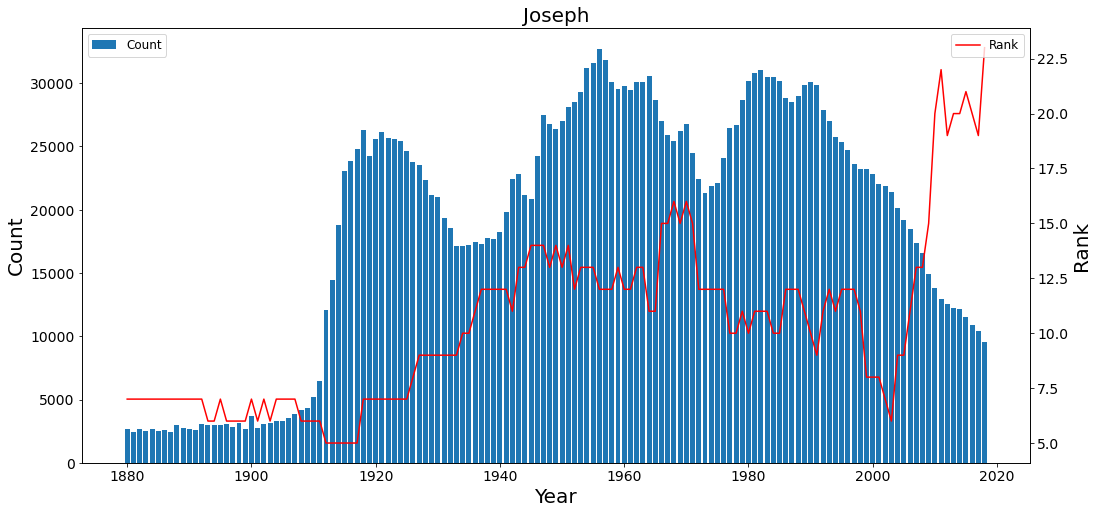

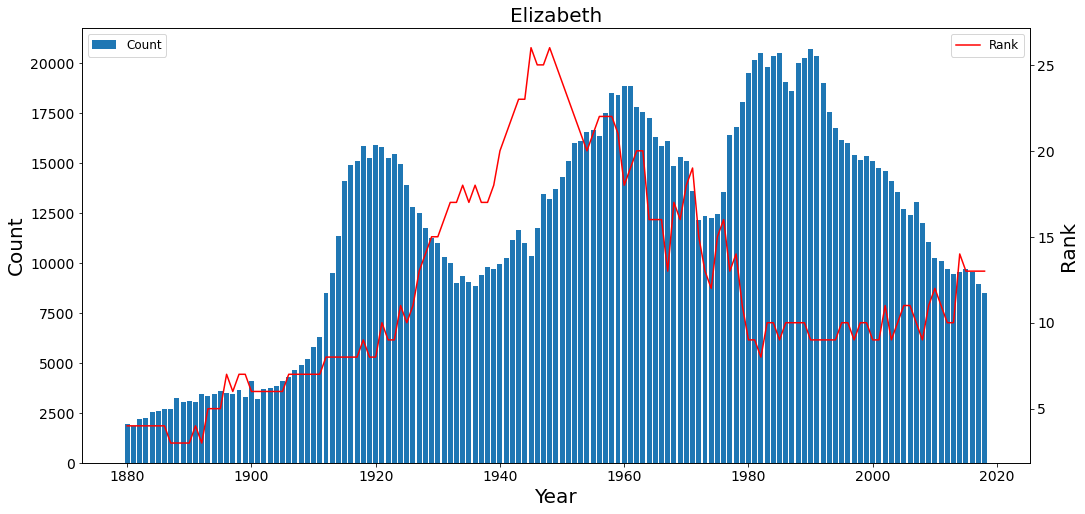

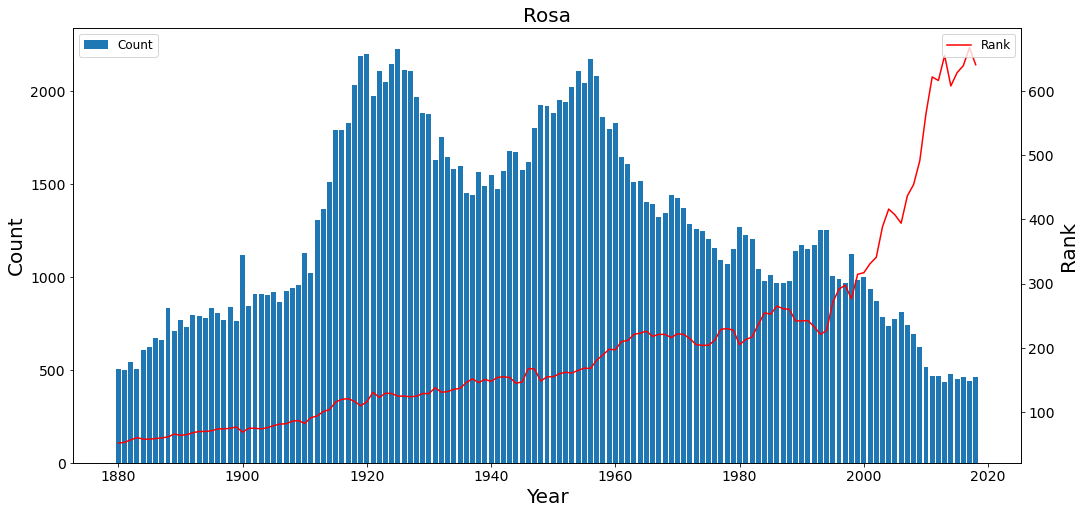

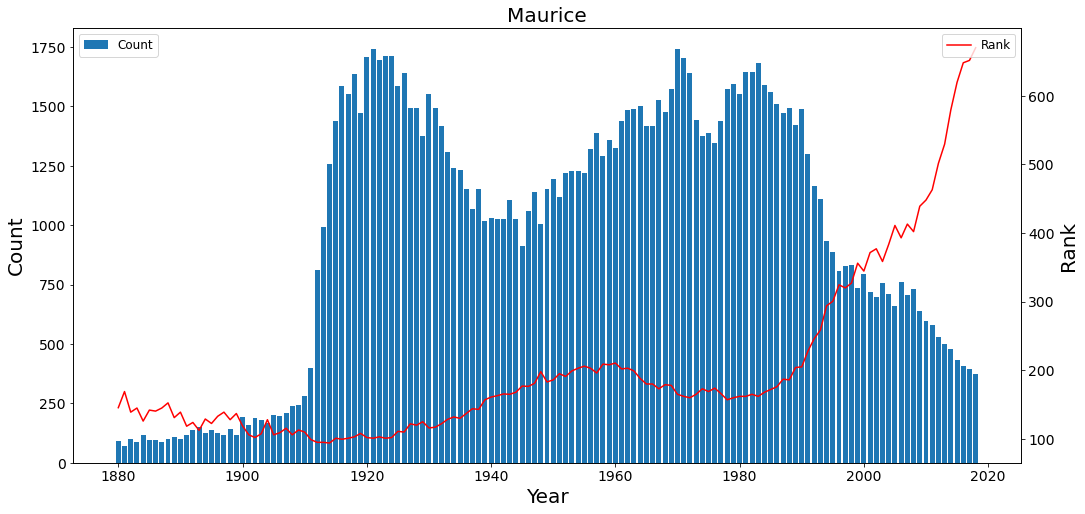

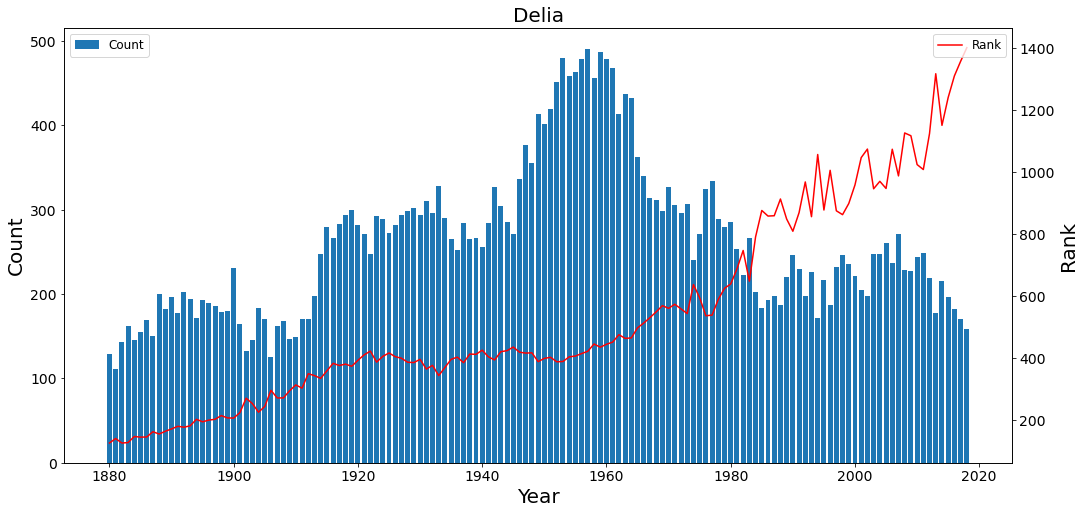

In [42]:
for name in l:
    plot_name(name=name[0], gender=name[1]  ,crit="Count")

In [43]:
agg

,Name,Gender,Total,First_year,Last_year,Max_count,No_year,Spike_score
0,Aaban,M,114,2007,2018,16,11,14
1,Aabha,F,35,2011,2016,9,5,26
2,Aabid,M,16,2003,2018,6,3,38
3,Aabidah,F,5,2018,2018,5,1,100
4,Aabir,M,10,2016,2018,5,2,50
...,...,...,...,...,...,...,...,...
109168,Zyvion,M,5,2009,2009,5,1,100
109169,Zyvon,M,7,2015,2015,7,1,100
109170,Zyyanna,F,6,2010,2010,6,1,100
109171,Zyyon,M,6,2014,2014,6,1,100


In [44]:
 spike=agg[(agg.Total>1000) & (agg.No_year>10)].sort_values(by="Spike_score",ascending=False).head(5)

In [45]:
spike

,Name,Gender,Total,First_year,Last_year,Max_count,No_year,Spike_score
57027,Kizzy,F,2325,1977,2016,1116,30,48
77282,Oaklyn,F,1381,2006,2018,627,11,45
25998,Deneen,F,3603,1947,2007,1604,52,45
72223,Moesha,F,1067,1996,2014,426,14,40
67328,Mareli,F,1038,1995,2018,411,22,40


In [46]:
oop=list(zip(spike.Name,spike.Gender))

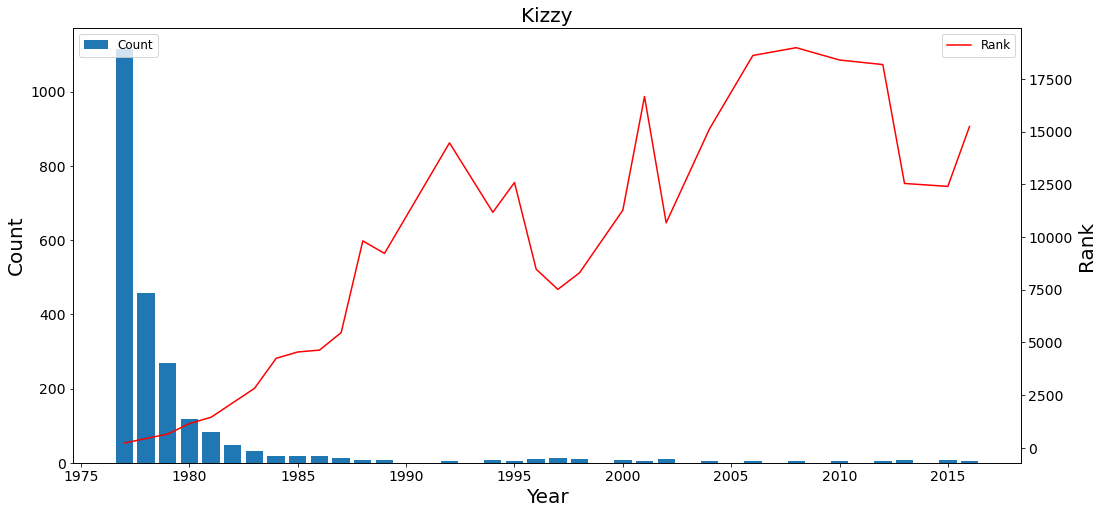

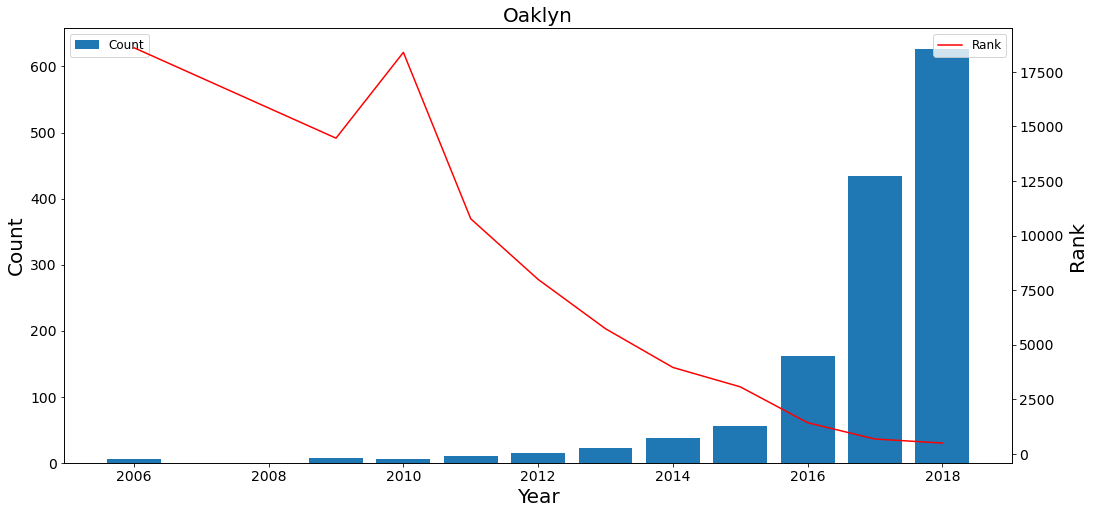

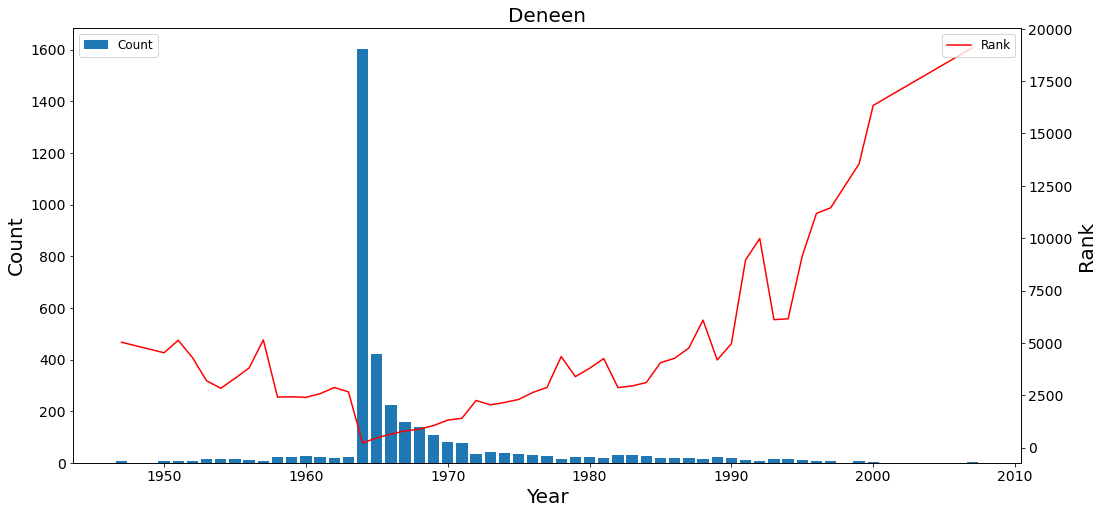

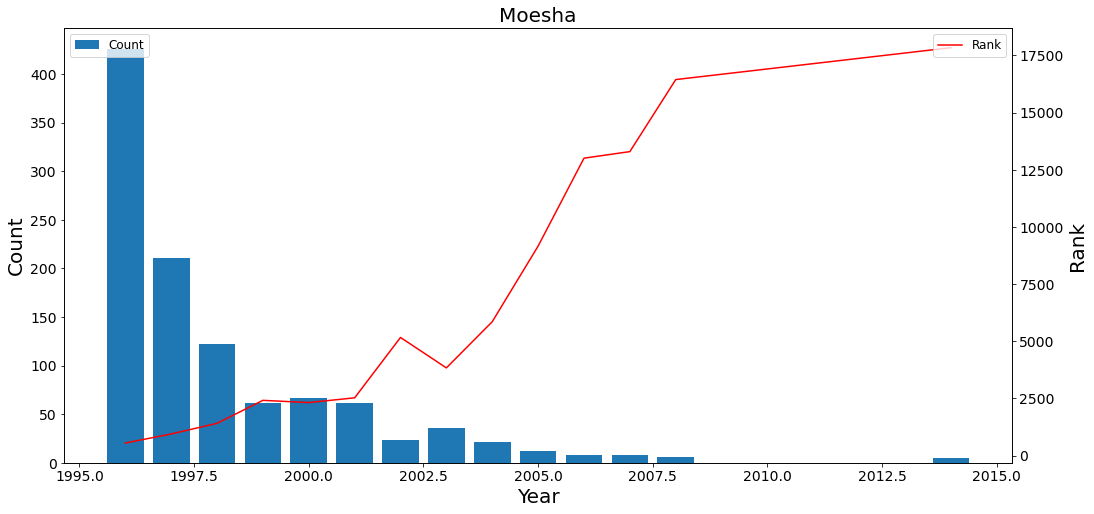

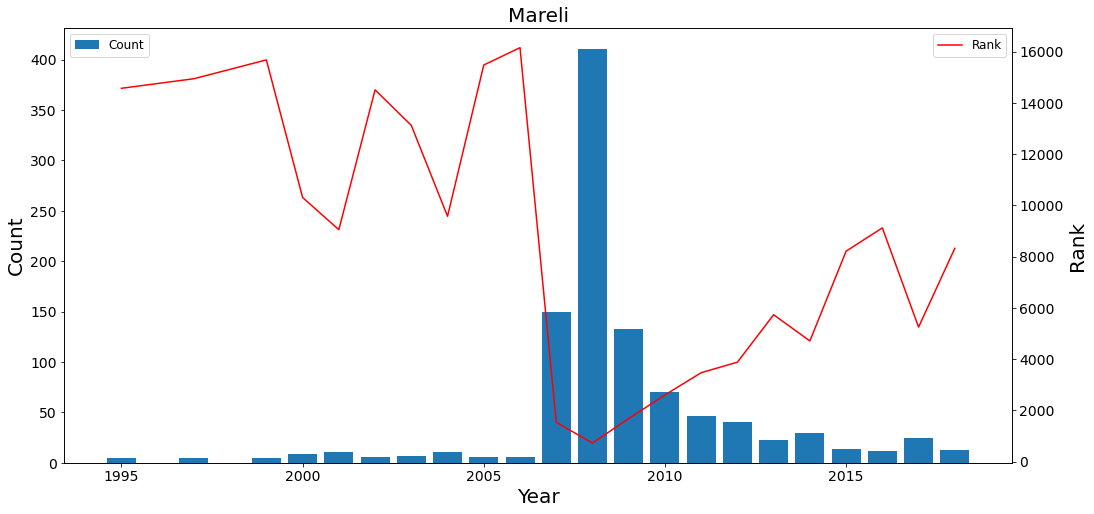

In [47]:
for name in oop:
    plot_name(name=name[0],gender=name[1], crit="Count")

In [48]:
df.groupby(["Name","Gender"]).Count.sum().unstack()

Gender,F,M
Name,,
Aaban,NaN,114
Aabha,35,NaN
Aabid,NaN,16
Aabidah,5,NaN
Aabir,NaN,10
...,...,...
Zyvion,NaN,5
Zyvon,NaN,7
Zyyanna,6,NaN


In [49]:
unisex=df.groupby(["Name","Gender"]).Count.sum().unstack()

In [50]:
unisex.dropna(inplace=True)     #deleted all the values having a null value
unisex

Gender,F,M
Name,,
Aaden,5,4828
Aadi,16,851
Aadyn,16,516
Aalijah,149,212
Aaliyah,87442,96
...,...,...
Zyion,168,918
Zyon,620,2638
Zyonn,5,40


In [51]:
unisex.min(axis=1).sort_values(ascending=False)

Name
Willie    146156
Jordan    131004
Leslie    112726
Taylor    110390
Jessie    110212
           ...  
Hany           5
Hao            5
Haram          5
Harjap         5
Aaden          5
Length: 10773, dtype: float64

In [52]:
unisex_names=unisex.min(axis=1).sort_values(ascending=False).index
unisex_names

Index(['Willie', 'Jordan', 'Leslie', 'Taylor', 'Jessie', 'Terry', 'Angel',
       'Riley', 'Jamie', 'Kelly',
       ...
       'Hanalei', 'Handy', 'Haniel', 'Hans', 'Hansel', 'Hany', 'Hao', 'Haram',
       'Harjap', 'Aaden'],
      dtype='object', name='Name', length=10773)

In [53]:
unisex.loc[unisex_names].head(7)       #showing both male and female 

Gender,F,M
Name,,
Willie,146156,448946
Jordan,131004,374513
Leslie,267081,112726
Taylor,320446,110390
Jessie,167462,110212
Terry,96895,422916
Angel,95710,231800


In [54]:
unisex=unisex[unisex.min(axis=1)>1000]
unisex

Gender,F,M
Name,,
Aaron,4307,581330
Adair,1271,1471
Adam,2038,554501
Addison,121435,12895
Adel,1335,1275
...,...,...
Yael,3527,3387
Yuri,2771,1859
Zachary,1518,535320


In [55]:
unisex_2=abs(unisex.F.div(unisex.M).sub(1)).sort_values().index
unisex_2

Index(['Joell', 'Unknown', 'Elisha', 'Quinn', 'Arlyn', 'Salem', 'Ashten',
       'Santana', 'Michal', 'Berlin',
       ...
       'Megan', 'Kathryn', 'Emma', 'Kathleen', 'Pamela', 'Susan', 'Deborah',
       'Samantha', 'Debra', 'Emily'],
      dtype='object', name='Name', length=935)

In [57]:
unisex.to_csv("US baby names.csv")